In [1]:
import torch
import torch.nn as nn
import torchvision

import keras4torch as k4t

k4t.__version__

'0.9.97'

In [2]:
mnist = torchvision.datasets.MNIST(root='./', download=True)
x, y = mnist.train_data.unsqueeze(1), mnist.train_labels

x = x.float() / 255.0    # scale the pixels to [0, 1]

x_train, y_train = x[:40000], y[:40000]
x_test, y_test = x[40000:], y[40000:]

In [3]:
model = torch.nn.Sequential(
    k4t.layers.Conv2d(32, kernel_size=3), nn.ReLU(),
    nn.MaxPool2d(2, 2), 
    k4t.layers.Conv2d(64, kernel_size=3), nn.ReLU(),
    nn.Flatten(),
    k4t.layers.Linear(10)
)

In [4]:
model = k4t.Model(model).build([1, 28, 28])

In [5]:
model.summary()

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d*: 1-1                           [-1, 32, 26, 26]          320
├─ReLU: 1-2                              [-1, 32, 26, 26]          --
├─MaxPool2d: 1-3                         [-1, 32, 13, 13]          --
├─Conv2d*: 1-4                           [-1, 64, 11, 11]          18,496
├─ReLU: 1-5                              [-1, 64, 11, 11]          --
├─Flatten: 1-6                           [-1, 7744]                --
├─Linear*: 1-7                           [-1, 10]                  77,450
Total params: 96,266
Trainable params: 96,266
Non-trainable params: 0
Total mult-adds (M): 2.50


In [6]:
model.compile(optimizer='adam', loss=nn.CrossEntropyLoss(), metrics=['acc'])

In [7]:
history = model.fit(x_train, y_train,
                	epochs=30,
                	batch_size=512,
                	validation_split=0.2,
                	)

Train on 32000 samples, validate on 8000 samples:
Epoch 1/30 - 2.9s - loss: 0.6270 - acc: 0.8250 - val_loss: 0.3044 - val_acc: 0.9113 - lr: 1e-03
Epoch 2/30 - 1.5s - loss: 0.2364 - acc: 0.9324 - val_loss: 0.1725 - val_acc: 0.9504 - lr: 1e-03
Epoch 3/30 - 1.6s - loss: 0.1379 - acc: 0.9606 - val_loss: 0.1141 - val_acc: 0.9695 - lr: 1e-03
Epoch 4/30 - 1.5s - loss: 0.0951 - acc: 0.9728 - val_loss: 0.0914 - val_acc: 0.9739 - lr: 1e-03
Epoch 5/30 - 1.5s - loss: 0.0756 - acc: 0.9782 - val_loss: 0.0745 - val_acc: 0.9795 - lr: 1e-03
Epoch 6/30 - 1.5s - loss: 0.0602 - acc: 0.9822 - val_loss: 0.0702 - val_acc: 0.9791 - lr: 1e-03
Epoch 7/30 - 1.6s - loss: 0.0527 - acc: 0.9846 - val_loss: 0.0634 - val_acc: 0.9820 - lr: 1e-03
Epoch 8/30 - 1.5s - loss: 0.0474 - acc: 0.9859 - val_loss: 0.0618 - val_acc: 0.9821 - lr: 1e-03
Epoch 9/30 - 1.5s - loss: 0.0440 - acc: 0.9865 - val_loss: 0.0655 - val_acc: 0.9813 - lr: 1e-03
Epoch 10/30 - 1.5s - loss: 0.0362 - acc: 0.9889 - val_loss: 0.0548 - val_acc: 0.9849 -

<AxesSubplot:>

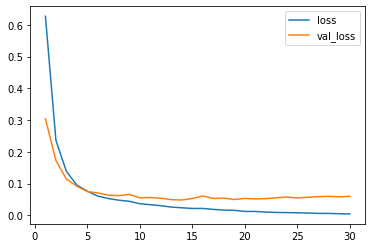

In [8]:
history.plot(kind='line', y=['loss', 'val_loss'])

In [9]:
model.evaluate(x_test, y_test)

{'loss': 0.06894921511411667, 'acc': 0.9841499924659729}